# **Milestone 2 - Fingerprint Processing**

This section contains tasks that will help you get familiar with the basics of fingerprint processing.

You may add more code and markdown cells as needed

## TASK 1
* Load the Fingerprint Image `datasets\task3\1.tiff`
* Display it using `plt.imshow()`
* Load the Fingerprint Image `datasets\task3\2.tiff`
* Display it using `plt.imshow()`

#### Load the Fingerprint Image `datasets\task3\1.tiff`

In [ ]:
## Hint: use opencv

import cv2
img = cv2.imread('datasets/task3/1.tiff')

#### Display the Fingerprint image

In [ ]:
## Hint: use matplotlib

import matplotlib as plt
plt.imshow(img)
plt.show()

#### Load the Fingerprint Image `datasets\task3\2.tiff`

In [ ]:
## Hint: use opencv

import cv2
img = cv2.imread('datasets/task3/2.tiff')

#### Display the Second Fingerprint image

In [ ]:
## Hint: use matplotlib

import matplotlib as plt
plt.imshow(img)
plt.show()

## TASK 2
* Extract the minutia points from the fingerprint images
* Display the minutia vectors

Hint: Each minutiae vector will have the following format: 
> `[x, y, theta, type]` where `type` is `0` for ridge ending and `1` for ridge bifurcation

#### Extract the minutia vectors from the fingerprint images of `TASK 1` as a list of vectors

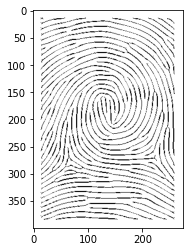

In [22]:
## Hint: use any library you can find from anywhere (but mention the source here in the notebook as a comment)

# from chatgpt
import cv2
import numpy as np

img = cv2.imread('datasets/task3/2.tiff')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur to smooth the image
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to obtain a binary image
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)


# Apply ridge detection to enhance the ridges in the image
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
ridge = cv2.filter2D(thresh, -1, kernel)

# Apply skeletonization to obtain a thin representation of the ridges
size = np.size(ridge)
skel = np.zeros(ridge.shape, np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
done = False
while not done:
    eroded = cv2.erode(ridge, element)
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(ridge, temp)
    skel = cv2.bitwise_or(skel, temp)
    ridge = eroded.copy()
    zeros = size - cv2.countNonZero(ridge)
    if zeros == size:
        done = True

import matplotlib.pyplot as plt

skel_uint8 = skel*-1
plt.imshow(skel_uint8, cmap='gray')
plt.show()
plt.imsave('skeletonized_image.png',skel_uint8,cmap='gray')
# cv2.imwrite('skeletonized_image.png', skel_uint8)

#### Display the minutia vectors

In [ ]:
## Hint: Each minutiae vector will have the following format: 
## [x, y, theta, type] where type is 0 for ridge ending and 1 for ridge bifurcation



## TASK 3
* Display the minutia vectors on the fingerprint images

#### Display the minutia vectors from `TASK 2` on the fingerprint images of `TASK 1`

In [ ]:
## Hint: use matplotlib and stacked images to show the results
## Use red circle for ridge ending and blue square for ridge bifurcation

